In [1]:
#1928152 Animesh Pathak Assignment-10
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

df1 = pd.read_csv('C:\\Users\\KIIT\\Downloads\\housing.csv~\\housing.csv')
df1.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [2]:
df1.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

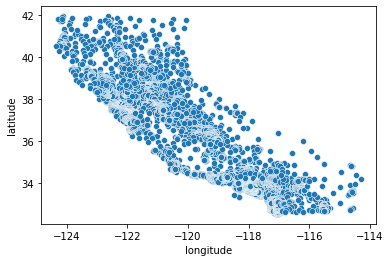

In [3]:
X= pd.DataFrame(np.c_[df1['longitude']],
                columns=['longitude'])
Y= df1['latitude']

sns.scatterplot(data=df1,x='longitude',y='latitude')

In [10]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df1[['longitude','latitude']])
y_predicted
df1['cluster']=y_predicted
df1.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,cluster
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,0.476125,0.328572,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,0.554893
std,0.199555,0.226988,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,0.652300
min,0.000000,0.000000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000
25%,0.253984,0.147715,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,0.000000
50%,0.583665,0.182784,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,0.000000
75%,0.631474,0.549416,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,1.000000
max,1.000000,1.000000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,2.000000


In [11]:
km.cluster_centers_

array([[0.64390096, 0.13641102],
       [0.24109419, 0.59225602],
       [0.4628538 , 0.36699759]])

In [6]:
scaler = MinMaxScaler()
scaler.fit(df1[['longitude']])
df1['longitude'] = scaler.transform(df1[['longitude']])

scaler.fit(df1[['latitude']])
df1['latitude'] = scaler.transform(df1[['latitude']])

print(df1['longitude'])
print(df1['latitude'])

0        0.211155
1        0.212151
2        0.210159
3        0.209163
4        0.209163
           ...   
20635    0.324701
20636    0.312749
20637    0.311753
20638    0.301793
20639    0.309761
Name: longitude, Length: 20640, dtype: float64
0        0.567481
1        0.565356
2        0.564293
3        0.564293
4        0.564293
           ...   
20635    0.737513
20636    0.738576
20637    0.732200
20638    0.732200
20639    0.725824
Name: latitude, Length: 20640, dtype: float64


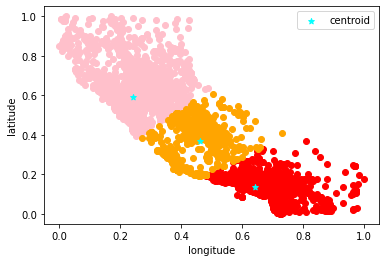

In [12]:
df2 = df1[df1.cluster==0]
df3 = df1[df1.cluster==1]
df4 = df1[df1.cluster==2]
plt.scatter(df2.longitude,df2['latitude'],color='red')
plt.scatter(df3.longitude,df3['latitude'],color='pink')
plt.scatter(df4.longitude,df4['latitude'],color='orange')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='cyan',marker='*',label='centroid')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.legend()

In [8]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df1[['longitude','latitude']])
    sse.append(km.inertia_)

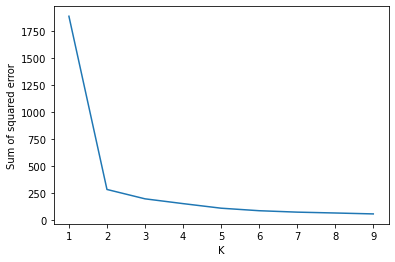

In [9]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)